In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Show plots inside the notebook
%matplotlib inline

# Load the dataset
df = pd.read_csv('cyclist_data_23T2.csv')

# Show the first few rows
df.head()


,date_AEST,Time_first,Time_last,Distance,calories,Speed_max,Speed_min,Speed_avg,Heartrate_max,Heartrate_min,...,Time_Taken,dist_point in 20,calories_point in 20,hertrate_point in20,Speed_point iin 20,power_points in 20,candence_point in 20,total_points,Duration,Workout_duration
0,12-Mar-21,##############################################...,##############################################...,10.31,222.0,33.24,0.0,18.74,183.99,104.18,...,0.355995,5.641587,4.712790,20.0,13.206483,11.103448,11.103448,65.767757,09:13:41,9
1,15-Mar-21,##############################################...,##############################################...,5.18,99.0,35.58,0.0,20.79,183.99,104.18,...,0.456019,2.834473,2.101650,20.0,14.651163,10.982509,10.982509,61.552303,10:13:41,10
2,18-Mar-21,##############################################...,##############################################...,20.12,479.0,53.56,0.0,23.97,183.99,104.18,...,0.234861,11.009576,10.168588,20.0,16.892178,15.812094,15.812094,89.694530,11:13:41,11
3,20-Mar-21,##############################################...,##############################################...,5.77,109.0,36.22,0.0,18.46,183.99,104.18,...,0.021157,3.157319,2.313938,20.0,13.009161,9.896052,9.896052,58.272522,12:13:41,12
4,30-Mar-21,##############################################...,##############################################...,5.95,134.0,44.60,0.0,23.84,183.99,104.18,...,0.260984,3.255814,2.844657,20.0,16.800564,14.320840,14.320840,71.542714,13:13:41,13


In [2]:
df.columns


Index(['date_AEST', 'Time_first', 'Time_last', 'Distance', 'calories',
       'Speed_max', 'Speed_min', 'Speed_avg', 'Heartrate_max', 'Heartrate_min',
       'Heartrate_avg', 'Cadence_max', 'Cadence_min', 'Cadence_avg',
       'Power_max', 'Power_min', 'Power_avg', 'FTP', 'Time_Taken',
       'dist_point in 20', 'calories_point in 20', 'hertrate_point in20',
       'Speed_point iin 20', 'power_points in 20', 'candence_point in 20',
       'total_points', 'Duration', 'Workout_duration'],
      dtype='object')

In [3]:
# Create terrain category based on average speed
def classify_terrain(speed):
    if speed >= 40:
        return 'Flat'
    elif speed >= 30:
        return 'Moderate'
    else:
        return 'Hilly'

df['Terrain_Type'] = df['Speed_avg'].apply(classify_terrain)

# Preview the updated DataFrame
df[['Speed_avg', 'Terrain_Type']].head()


,Speed_avg,Terrain_Type
0,18.74,Hilly
1,20.79,Hilly
2,23.97,Hilly
3,18.46,Hilly
4,23.84,Hilly


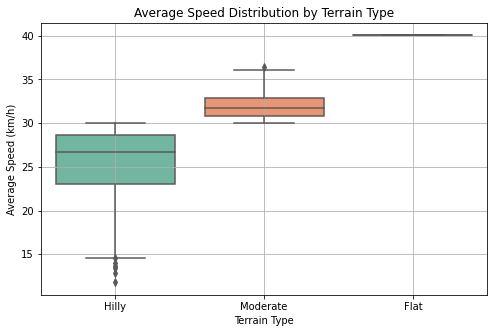

In [4]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='Terrain_Type', y='Speed_avg', data=df, palette='Set2')
plt.title('Average Speed Distribution by Terrain Type')
plt.xlabel('Terrain Type')
plt.ylabel('Average Speed (km/h)')
plt.grid(True)
plt.show()


In [5]:
df.groupby('Terrain_Type')['Speed_avg'].describe()


,count,mean,std,min,25%,50%,75%,max
Terrain_Type,,,,,,,,
Flat,1.0,40.040000,NaN,40.04,40.040,40.04,40.040,40.04
Hilly,169.0,25.342604,4.379645,11.78,23.040,26.70,28.680,29.99
Moderate,139.0,31.994532,1.440450,30.02,30.815,31.76,32.925,36.40


In [6]:
# Load additional session data from Strava activities
strava_df = pd.read_csv('strava_activities.csv')

# Show its structure
strava_df.head()


,Activity ID,Activity Date,Activity Name,Activity Type,Activity Description,Elapsed Time,Distance,Max Heart Rate,Relative Effort,Commute,...,Total Grit,Average Flow,Flagged,Average Elapsed Speed,Dirt Distance,Newly Explored Distance,Newly Explored Dirt Distance,Activity Count,Total Steps,Media
0,477882782,"1 Jan 2016, 21:21:39",Morning Run,Run,NaN,6948,21.15,NaN,NaN,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,477882787,"17 Jan 2016, 22:05:40",Morning Run,Run,NaN,2680,8.09,NaN,NaN,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,477882788,"18 Jan 2016, 22:18:36",Morning Run,Run,NaN,2657,8.17,NaN,NaN,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,477882789,"16 Jan 2016, 21:10:39",Morning Run,Run,NaN,5401,16.43,NaN,NaN,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,477882792,"19 Jan 2016, 23:02:41",Morning Run,Run,NaN,2587,8.11,NaN,NaN,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
strava_df.columns


Index(['Activity ID', 'Activity Date', 'Activity Name', 'Activity Type',
       'Activity Description', 'Elapsed Time', 'Distance', 'Max Heart Rate',
       'Relative Effort', 'Commute', 'Activity Private Note', 'Activity Gear',
       'Filename', 'Athlete Weight', 'Bike Weight', 'Elapsed Time.1',
       'Moving Time', 'Distance.1', 'Max Speed', 'Average Speed',
       'Elevation Gain', 'Elevation Loss', 'Elevation Low', 'Elevation High',
       'Max Grade', 'Average Grade', 'Average Positive Grade',
       'Average Negative Grade', 'Max Cadence', 'Average Cadence',
       'Max Heart Rate.1', 'Average Heart Rate', 'Max Watts', 'Average Watts',
       'Calories', 'Max Temperature', 'Average Temperature',
       'Relative Effort.1', 'Total Work', 'Number of Runs', 'Uphill Time',
       'Downhill Time', 'Other Time', 'Perceived Exertion', 'Type',
       'Start Time', 'Weighted Average Power', 'Power Count',
       'Prefer Perceived Exertion', 'Perceived Relative Effort', 'Commute.1',
    

In [9]:
# Convert both Distance columns to numeric
df['Distance'] = pd.to_numeric(df['Distance'], errors='coerce')
strava_df['Distance'] = pd.to_numeric(strava_df['Distance'], errors='coerce')



In [10]:
# Merge based on 'Distance' column
merged_df = pd.merge(df, strava_df, on='Distance', how='inner')

# Preview merged data
merged_df[['Distance', 'Speed_avg', 'Terrain_Type', 'Average Grade', 'Elevation Gain', 'Max Heart Rate']].head()


,Distance,Speed_avg,Terrain_Type,Average Grade,Elevation Gain,Max Heart Rate
0,10.31,18.74,Hilly,-0.035875,27.857100,NaN
1,10.31,18.74,Hilly,-0.000970,33.832054,169.0
2,10.31,18.74,Hilly,0.027158,33.325146,170.0
3,10.78,20.88,Hilly,0.000000,0.000000,175.0
4,8.70,20.56,Hilly,-0.149384,33.683701,NaN


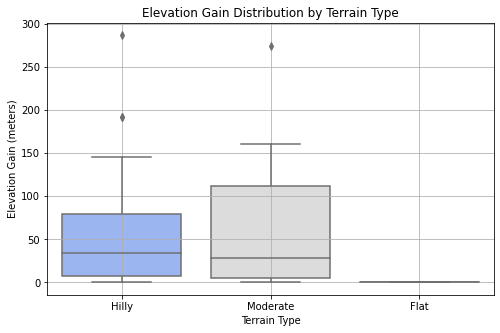

In [11]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='Terrain_Type', y='Elevation Gain', data=merged_df, palette='coolwarm')
plt.title('Elevation Gain Distribution by Terrain Type')
plt.xlabel('Terrain Type')
plt.ylabel('Elevation Gain (meters)')
plt.grid(True)
plt.show()


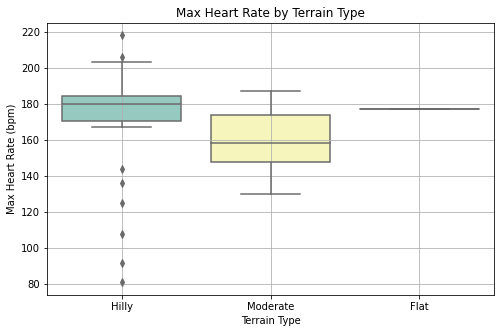

In [12]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='Terrain_Type', y='Max Heart Rate', data=merged_df, palette='Set3')
plt.title('Max Heart Rate by Terrain Type')
plt.xlabel('Terrain Type')
plt.ylabel('Max Heart Rate (bpm)')
plt.grid(True)
plt.show()
